# Modeling

## Vectorize the data

Now that we have a dataframe with 3 columns :  `tokenized` (title + synopsis), `genre` and `length`, we can vectorize the data. We will use the `Bag-of-Words` method.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
import pickle

import sys
sys.path.append('../preprocessing')

from process import *

c:\Users\elmah\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\elmah\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
df_train = pd.read_csv('../data/allocine_genres_train.csv')


df_train = process_df(df_train)


In [13]:
df_train.head()

,synopsis_title,genre
0,visit a celebr detect belg embarqu orient expr...,policier
1,jeun homm origin modest accus meurtr per risqu...,drame
2,lorsqu mer quatr jeun enfant apprend brutal ca...,drame
3,vagabond eprend bel jeun vendeux fleur aveugl ...,romance
4,histoir vrai premi afro americain a avoir inte...,biopic


### TF-IDF

We will start by vectorizing the data using TF-IDF. TF-IDF stands for `Term Frequency - Inverse Document Frequency`. It is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus. It is often used as a weighting factor in searches of information retrieval, text mining, and user modeling. The TF-IDF value increases proportionally to the number of times a word appears in the document and is offset by the number of documents in the corpus that contain the word, which helps to adjust for the fact that some words appear more frequently in general.

In [14]:
X_train, X_test, y_train, y_test = train_test_split(df_train['synopsis_title'], df_train['genre'], test_size=0.2, random_state=42)

models = []
accuracy_scores = []


vectorizer = TfidfVectorizer(ngram_range = (1,1), max_df=0.85,min_df=0.01,lowercase=False)
tfid_X_train = vectorizer.fit_transform(X_train)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(tfid_X_train, y_train)

tfid_X_test = vectorizer.transform(X_test)
y_pred = clf.predict(tfid_X_test)

print("DecisionTreeClassifier accuracy : ", accuracy_score(y_test, y_pred))
models.append("DecisionTreeClassifier")
accuracy_scores.append(accuracy_score(y_test, y_pred))


DecisionTreeClassifier accuracy :  0.22956521739130434


In [15]:


clf = MultinomialNB()
clf.fit(tfid_X_train, y_train)

y_pred = clf.predict(tfid_X_test)

print("MultinomialNB accuracy : ", accuracy_score(y_test, y_pred))
models.append("MultinomialNB")
accuracy_scores.append(accuracy_score(y_test, y_pred))

MultinomialNB accuracy :  0.43478260869565216


In [16]:


clf = LogisticRegression(random_state=42)
clf.fit(tfid_X_train, y_train)

y_pred = clf.predict(tfid_X_test)

print("LogisticRegression accuracy : ", accuracy_score(y_test, y_pred))
models.append("LogisticRegression")
accuracy_scores.append(accuracy_score(y_test, y_pred))

LogisticRegression accuracy :  0.45565217391304347


In [17]:


clf = RandomForestClassifier(random_state=42)
clf.fit(tfid_X_train, y_train)

y_pred = clf.predict(tfid_X_test)

print("RandomForestClassifier accuracy : ", accuracy_score(y_test, y_pred))
models.append("RandomForestClassifier")
accuracy_scores.append(accuracy_score(y_test, y_pred))

RandomForestClassifier accuracy :  0.41043478260869565


In [18]:


clf = AdaBoostClassifier(random_state=42)
clf.fit(tfid_X_train, y_train)

y_pred = clf.predict(tfid_X_test)

print("AdaBoostClassifier accuracy : ", accuracy_score(y_test, y_pred))
models.append("AdaBoostClassifier")
accuracy_scores.append(accuracy_score(y_test, y_pred))

AdaBoostClassifier accuracy :  0.3234782608695652


In [19]:


clf = GradientBoostingClassifier(random_state=42)
clf.fit(tfid_X_train, y_train)

y_pred = clf.predict(tfid_X_test)

print("GradientBoostingClassifier accuracy : ", accuracy_score(y_test, y_pred))
models.append("GradientBoostingClassifier")
accuracy_scores.append(accuracy_score(y_test, y_pred))

GradientBoostingClassifier accuracy :  0.38956521739130434


In [20]:


clf = SGDClassifier(random_state=42)
clf.fit(tfid_X_train, y_train)

y_pred = clf.predict(tfid_X_test)

print("SGDClassifier accuracy : ", accuracy_score(y_test, y_pred))
models.append("SGDClassifier")
accuracy_scores.append(accuracy_score(y_test, y_pred))


SGDClassifier accuracy :  0.4017391304347826


In [21]:


clf = SVC(random_state=42)
clf.fit(tfid_X_train, y_train)

y_pred = clf.predict(tfid_X_test)

print("SVC accuracy : ", accuracy_score(y_test, y_pred))
models.append("SVC")
accuracy_scores.append(accuracy_score(y_test, y_pred))

SVC accuracy :  0.44


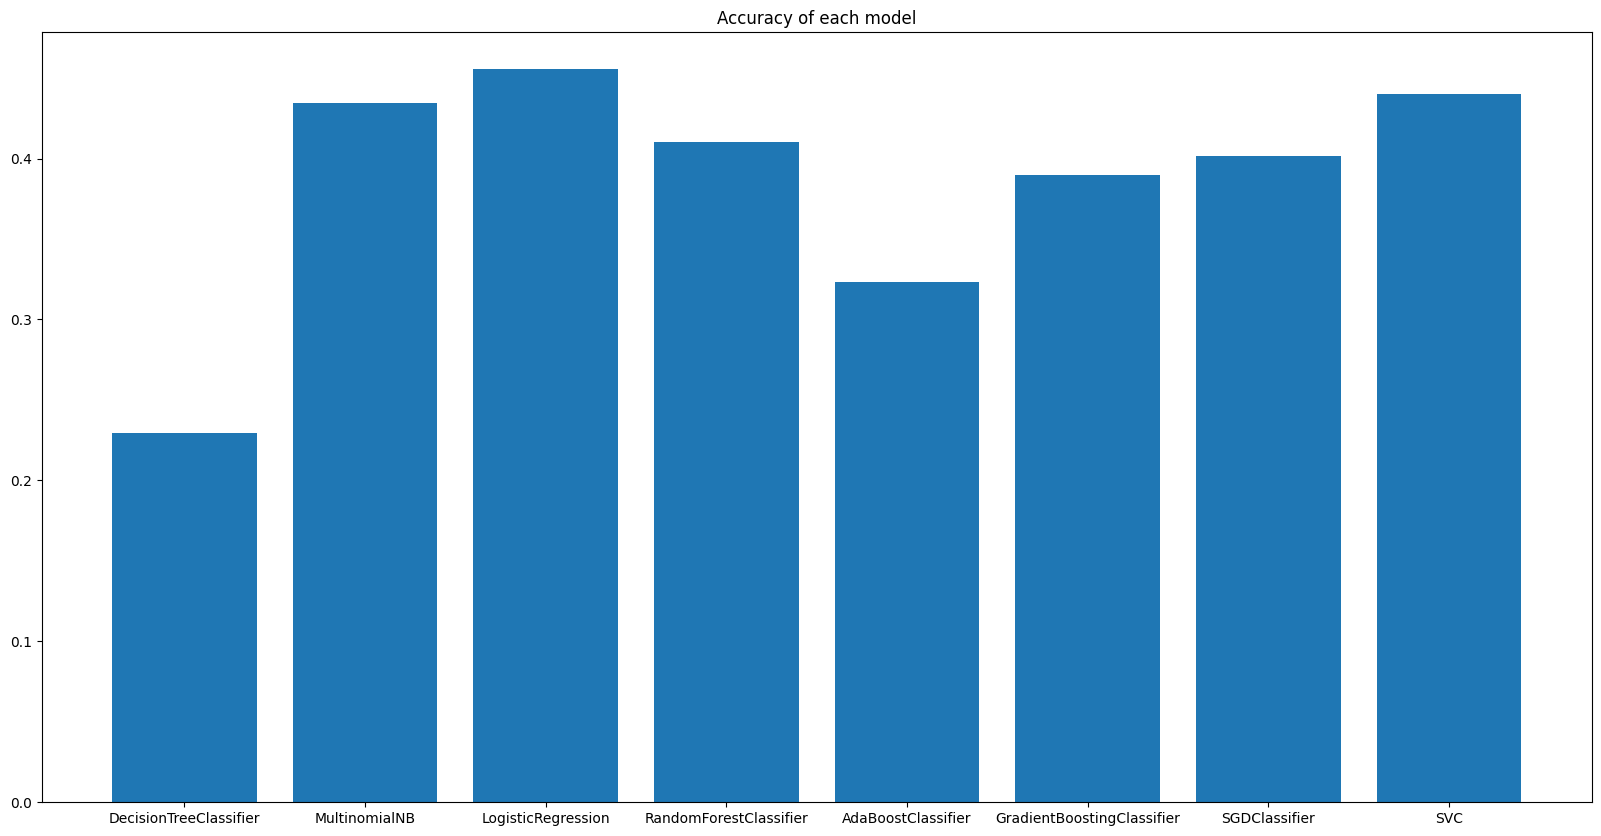

In [22]:
# plot the accuracy of each model
plt.figure(figsize=(20,10))
plt.bar(models, accuracy_scores)
plt.title("Accuracy of each model")
plt.show()



We can see that Logistic Regression has the best score with TF-IDF. We will use this model to predict the genre of the movies.But first, we will try to improve the score by using a different vectorizer like Bag-of-Words.

### Bag-of-Words

In [23]:
# bag of words

models_bow = []
accuracy_scores_bow = []

vectorizer = CountVectorizer(ngram_range = (1,1), max_df=0.85,min_df=0.01,lowercase=False)
bow_X_train = vectorizer.fit_transform(X_train)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(bow_X_train, y_train)

bow_X_test = vectorizer.transform(X_test)
y_pred = clf.predict(bow_X_test)

print("DecisionTreeClassifier accuracy : ", accuracy_score(y_test, y_pred))
models_bow.append("DecisionTreeClassifier")
accuracy_scores_bow.append(accuracy_score(y_test, y_pred))


DecisionTreeClassifier accuracy :  0.26608695652173914


In [24]:
clf = MultinomialNB()
clf.fit(bow_X_train, y_train)

y_pred = clf.predict(bow_X_test)

print("MultinomialNB accuracy : ", accuracy_score(y_test, y_pred))
models_bow.append("MultinomialNB")
accuracy_scores_bow.append(accuracy_score(y_test, y_pred))

MultinomialNB accuracy :  0.48869565217391303


In [25]:
clf = LogisticRegression(random_state=42)
clf.fit(bow_X_train, y_train)

y_pred = clf.predict(bow_X_test)

print("LogisticRegression accuracy : ", accuracy_score(y_test, y_pred))
models_bow.append("LogisticRegression")
accuracy_scores_bow.append(accuracy_score(y_test, y_pred))

LogisticRegression accuracy :  0.4156521739130435


c:\Users\elmah\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
clf = RandomForestClassifier(random_state=42)
clf.fit(bow_X_train, y_train)

y_pred = clf.predict(bow_X_test)

print("RandomForestClassifier accuracy : ", accuracy_score(y_test, y_pred))
models_bow.append("RandomForestClassifier")
accuracy_scores_bow.append(accuracy_score(y_test, y_pred))

RandomForestClassifier accuracy :  0.4


In [27]:
clf = AdaBoostClassifier(random_state=42)
clf.fit(bow_X_train, y_train)

y_pred = clf.predict(bow_X_test)

print("AdaBoostClassifier accuracy : ", accuracy_score(y_test, y_pred))
models_bow.append("AdaBoostClassifier")
accuracy_scores_bow.append(accuracy_score(y_test, y_pred))

AdaBoostClassifier accuracy :  0.3808695652173913


In [28]:
clf = GradientBoostingClassifier(random_state=42)
clf.fit(bow_X_train, y_train)

y_pred = clf.predict(bow_X_test)

print("GradientBoostingClassifier accuracy : ", accuracy_score(y_test, y_pred))
models_bow.append("GradientBoostingClassifier")
accuracy_scores_bow.append(accuracy_score(y_test, y_pred))


GradientBoostingClassifier accuracy :  0.39304347826086955


In [29]:
clf = SGDClassifier(random_state=42)
clf.fit(bow_X_train, y_train)

y_pred = clf.predict(bow_X_test)

print("SGDClassifier accuracy : ", accuracy_score(y_test, y_pred))
models_bow.append("SGDClassifier")
accuracy_scores_bow.append(accuracy_score(y_test, y_pred))


SGDClassifier accuracy :  0.34608695652173915


In [30]:
clf = SVC(random_state=42)
clf.fit(bow_X_train, y_train)

y_pred = clf.predict(bow_X_test)

print("SVC accuracy : ", accuracy_score(y_test, y_pred))
models_bow.append("SVC")
accuracy_scores_bow.append(accuracy_score(y_test, y_pred))

SVC accuracy :  0.40347826086956523


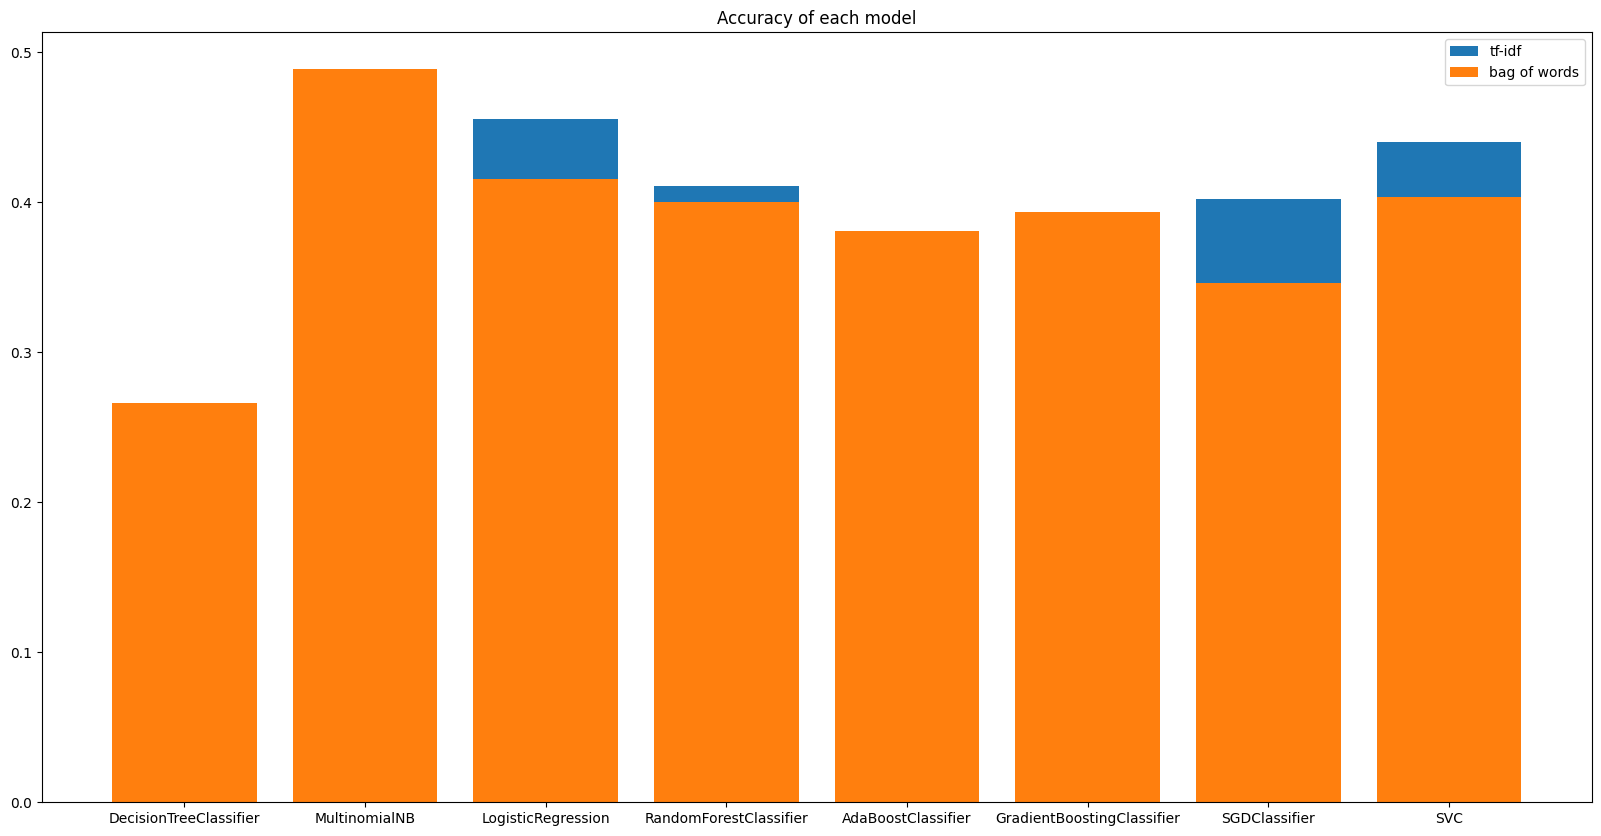

In [31]:
# plot the accuracy of each model and compare with tf-idf
plt.figure(figsize=(20,10))
plt.bar(models, accuracy_scores, label="tf-idf")
plt.bar(models_bow, accuracy_scores_bow, label="bag of words")
plt.title("Accuracy of each model")
plt.legend()
plt.show()


We can see that Multinomial Naive Bayes has the best score with Bag-of-Words. We will use this model to predict the genre of the movies.

## Test the model

We will now test our model on our test set using the Bag-of-Words vectorizer with Multinomial Naive Bayes.

In [5]:
# test the model with new data using our best model, bow with MultinomialNB
from sklearn.naive_bayes import MultinomialNB
# clf = MultinomialNB()
# clf.fit(bow_X_train, y_train)

# # save the model
# pickle.dump(clf, open("model.pkl", "wb"))
# pickle.dump(vectorizer, open("vectorizer.pkl", "wb"))


# load the model
model = pickle.load(open("trained_model/model.pkl", "rb"))
vectorizer = pickle.load(open("trained_model/vectorizer.pkl", "rb"))

# test with new data
df_test = pd.read_csv('../data/allocine_genres_test.csv')
df_test = process_df(df_test)

X_test = df_test["synopsis_title"]
y_test = df_test["genre"]

bow_X_test = vectorizer.transform(X_test)
y_pred = model.predict(bow_X_test)

print("MultinomialNB accuracy : ", accuracy_score(y_test, y_pred))

# lets try with a new synopsis
synopsis = "Dans la ville de New York, le détective John Smith est sur la piste d'un tueur en série qui terrorise la ville depuis plusieurs mois. Alors que l'enquête piétine, le meurtrier continue de sévir et les victimes s'accumulent. John, qui est hanté par ses propres démons, est déterminé à arrêter le tueur avant qu'il ne frappe à nouveau. Au fil de l'enquête, John rencontre plusieurs personnages suspects, dont une ex-petite amie du tueur et un membre influent de la mafia locale. Il doit naviguer dans un monde sombre et dangereux pour découvrir la vérité sur l'identité du tueur. Alors que les indices s'accumulent et que la pression monte, John doit faire face à ses propres démons intérieurs et aux doutes de ses collègues. Dans une course contre la montre, il doit résoudre le mystère avant qu'il ne soit trop tard et que le tueur ne frappe de nouveau. Le film est rempli de suspense, de tension et de rebondissements jusqu'à son dénouement final choquant."
titre = "Au coeur de la nuit"

synopsis_2 = "Nous suivons Marie Curie dès ses débuts en Pologne, alors qu'elle doit lutter contre les préjugés de genre pour poursuivre ses études scientifiques. Elle rencontre ensuite Pierre Curie, un physicien français, et ils tombent amoureux. Ensemble, ils commencent à travailler sur la radioactivité et découvrent le radium et le polonium, pour lesquels ils reçoivent le prix Nobel de physique en 1903. Mais leur travail n'a pas été facile et ils ont dû surmonter de nombreux obstacles, notamment les préjugés de genre et les réticences de la communauté scientifique. Ils ont également dû faire face à des tragédies personnelles, notamment la mort prématurée de Pierre. Après la mort de Pierre, Marie poursuit ses recherches et devient la première femme professeure à la Sorbonne. Elle reçoit également un deuxième prix Nobel, cette fois en chimie, pour son travail sur les éléments radioactifs. Le film montre comment Marie Curie a changé la face de la science et a ouvert la voie à d'autres femmes scientifiques. Mais il montre également les sacrifices qu'elle a dû faire pour y parvenir, notamment la lutte pour concilier son travail et sa vie de famille. Le film est une célébration de la vie extraordinaire de Marie Curie, une femme qui a brisé les barrières et ouvert la voie à de nouvelles découvertes scientifiques"
titre_2 = "La vie extraordinaire de Marie Curie"

synopsis_3 = "Sophie est une jeune femme ambitieuse qui travaille dans une grande entreprise. Elle est passionnée par son travail et sa vie sentimentale est au second plan. Un jour, elle rencontre Jake, un artiste bohème et charismatique. Malgré leurs différences, ils sont attirés l'un par l'autre et commencent une relation. Leur amour est intense et passionné, mais leur relation est mise à rude épreuve par les différences de leurs vies. Sophie doit naviguer dans le monde des arts de Jake, qui est très différent de son monde d'affaires. Et Jake doit faire face aux attentes de Sophie en matière de stabilité et de sécurité financière. Alors que leur relation devient de plus en plus sérieuse, ils doivent faire face à des défis imprévus qui mettent leur amour à l'épreuve. Ils doivent trouver un équilibre entre leurs vies et leurs rêves, tout en restant fidèles l'un à l'autre. Le film montre comment l'amour peut être imprévisible et inattendu, et comment il peut nous amener à repenser nos priorités et nos choix de vie. Les personnages principaux sont confrontés à des choix difficiles, mais ils sont prêts à tout pour leur amour. Le film est rempli de scènes romantiques, de moments d'humour et d'émotion, et offre une belle réflexion sur la vie et l'amour."
titre_3 = "Un Amour Inattendu"

# create a dataframe with the two new movie with two columns, synopsis and title
df_new = pd.DataFrame()
df_new["synopsis"] = [synopsis, synopsis_2, synopsis_3]
df_new["titre"] = [titre, titre_2, titre_3]

# process the dataframe
df_new = process_df(df_new, train = False)

# predict the genre
bow_X_new = vectorizer.transform(df_new["synopsis_title"])
y_pred_new = model.predict(bow_X_new)

print("Predicted genres : ", y_pred_new)




MultinomialNB accuracy :  0.4965229485396384
Predicted genres :  ['policier' 'documentaire' 'romance']


We can see that our model has a score of 0.49. For a first model, it is not bad. We will work with this model.

## Conclusion

We tested the model on some custom data and it seems to work well. It seems that the synopsis needs to be long enough to be able to predict the genre of the movie.